*Numerical Approximation of PDEs - Summer 2024*

# Simple explicit scheme for 1D advection

[**Jörn Behrens**](http://www.math.uni-hamburg.de/numgeo/) [(joern.behrens@uni-hamburg.de)](mailto:joern.behrens@uni-hamburg.de)

## Introduction

In this notebook we want to implement a simple advection scheme for the 1D advection equation, given by
$$
\frac{\partial \rho}{\partial t} + v\cdot\frac{\partial \rho}{\partial x}= 0,
$$
where $\rho$ is an advected constituent, $v\equiv 1$ is a given wind (assumed to be constant 1), and $(x,t)$ is the space-time coordinate.

In order to derive an explicit numerical scheme, we apply a forward finite difference in time and a centered finite difference in space, i.e.
$$
\frac{\partial\rho}{\partial t} \approx \frac{\rho(t+\Delta t,x)-\rho(t,x)}{\Delta t}
$$
and
$$
\frac{\partial\rho}{\partial x} \approx \frac{\rho(t,x+\Delta x)-\rho(t,x-\Delta x)}{2\Delta x}.
$$

## Grid Function

We define a grid function by subdividing the temporal dimension into intervals $t^j = j\cdot \Delta t$ ($j=0,\ldots,K$), where $K\Delta t=T$. Similarly, we introduce a grid for the spatial dimension by $x_i = i\cdot \Delta x$ ($i=0,\ldots,N$).

With this the discrete form of the transport equation reads
$$
  \rho_i^{j+1}= \rho_i^j - \nu(\rho_{i+1}^j - \rho_{i-1}^j),
$$
where $\nu=v\frac{\Delta t}{2\Delta x}$ and the indices $i$ and $j$ stand for the space and time step, resp. This scheme is called *forward-in-time-centered-in-space* (FTCS) scheme.

## Time stepping scheme

In order to implement this scheme, we define a function that takes the grid $x$, the time-step $\Delta t$, the final time $T$, and an initial field $\rho_0$ as input parameters and returns $\rho(x,T)$.

In [1]:
from numpy import arange
def ftcsadvect(x,dt,T,rho0):
#-- compute spatial step size
    dx= x[1]-x[0]

    #-- initial condition; set up future time array
    u0=rho0.copy()
    u1=u0.copy()
    nu= dt/(2.*dx)

    #-- now the time loop
    for t in arange(0,T+dt,dt):
        u1[1:(len(x)-1)]= u0[1:(len(x)-1)] - nu* (u0[2:len(x)]-u0[0:(len(x)-2)])
        u1[0] = u0[0] - nu* (u0[1] - u0[len(x)-1])
        u1[len(x)-1]= u0[(len(x)-1)] - nu* (u0[0]-u0[len(x)-2])
        u0=u1.copy()

    #-- set output value
    rho = u1  
    return rho


## Initial Conditions

We want to generate initial conditions in their own functions. The two alternative initial conditions are given by either
$$
\rho_0(x)=e^{-\frac{(20x)^2}{2}},
$$
or
$$
\rho_0(x)=e^{\frac{-x^2}{2 \sigma^2}}\cdot\cos(Kx),
$$
where $\sigma=0.1$, and $K=\frac{\pi}{\sigma}$.

In [2]:
from numpy import pi, exp, cos
def init1(x):
    u0=exp(-(20*x)**2/2)
    return u0

def init2(x):
    sigm= 0.1; Ka= pi/sigm
    u0= exp(-(x**2)/(2*sigm**2)) * cos(Ka*x)
    return u0


## Main Test Program

Now that we have generated our time-stepping function, we can build a main program to test our scheme.
1. Let us set some initial values (time-step size, etc.) first.
2. Then we will set initial conditions by calling the corresponding functions.
3. Then we call the Lax-Friedrichs function defined earlier.
4. We compute an analytic solution (remember, this is just the initial solution shifted).
5. Finally, we compare our solutions.

*** INFO: relative error in inf-norm ***
          FTCS method: 1.1871
*** INFO: relative error in two-norm ***
          FTCS method: 1.0986


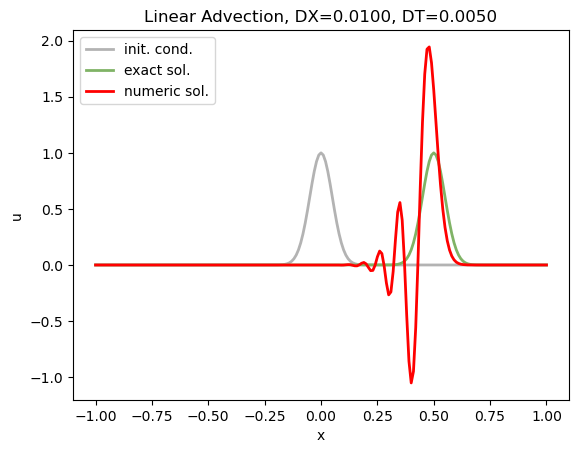

In [3]:
def testlf():
    from numpy import arange, pi, exp, cos, inf
    from numpy.linalg import norm
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    #-- initial values/settings
    dx= 1./100.              #- spatial step size
    courant= 0.5             #- Courant No.
    dt= courant* dx          #- time step size
    Tend= .5                 #- final time
    x= arange(-1,1+dx,dx)    #- spatial grid
    
    #-- initial conditions
    u0 = init1(x)
    
    #-- Lax-Friedrichs advection scheme
    uftcs = ftcsadvect(x,dt,Tend,u0)
    
    #-- compute exact solution to compare with
    uexact = init1(x-Tend)
    
    #-- plot the result, the initial condition, and the exact solution
    fig = plt.figure(1)
    h1=plt.plot(x,u0,linewidth=2, c=[0.7, 0.7, 0.7], label='init. cond.')
    h2=plt.plot(x,uexact,linewidth=2, c=[0.5, 0.7, 0.4], label='exact sol.')
    h3=plt.plot(x,uftcs,linewidth=2, c='red', label='numeric sol.')
    plt.legend(loc='upper left')
    plt.title('Linear Advection, DX=' + '%6.4f' % (dx) + ', DT=' + '%6.4f' % (dt))
    plt.xlabel('x')
    plt.ylabel('u')
  
    #-- compute error norms:
    infftcs= norm((uexact-uftcs),inf)/norm(uexact,inf)
    print('*** INFO: relative error in inf-norm ***')
    print('          FTCS method: ' + '%6.4f' % (infftcs))
    twoftcs= norm((uexact-uftcs))/norm(uexact)
    print('*** INFO: relative error in two-norm ***')
    print('          FTCS method: ' + '%6.4f' % (twoftcs))
    
    plt.show()

if __name__=="__main__":
    testlf()
